# Google Colab 練習

### 導入numpy做簡單測試

In [1]:
import numpy as np
a = 345234
print(a)

345234


### 使用tensorflow檢查GPU是否運行
* 得先確保將執行階段切換到GPU(以下結果使用T4 GPU)
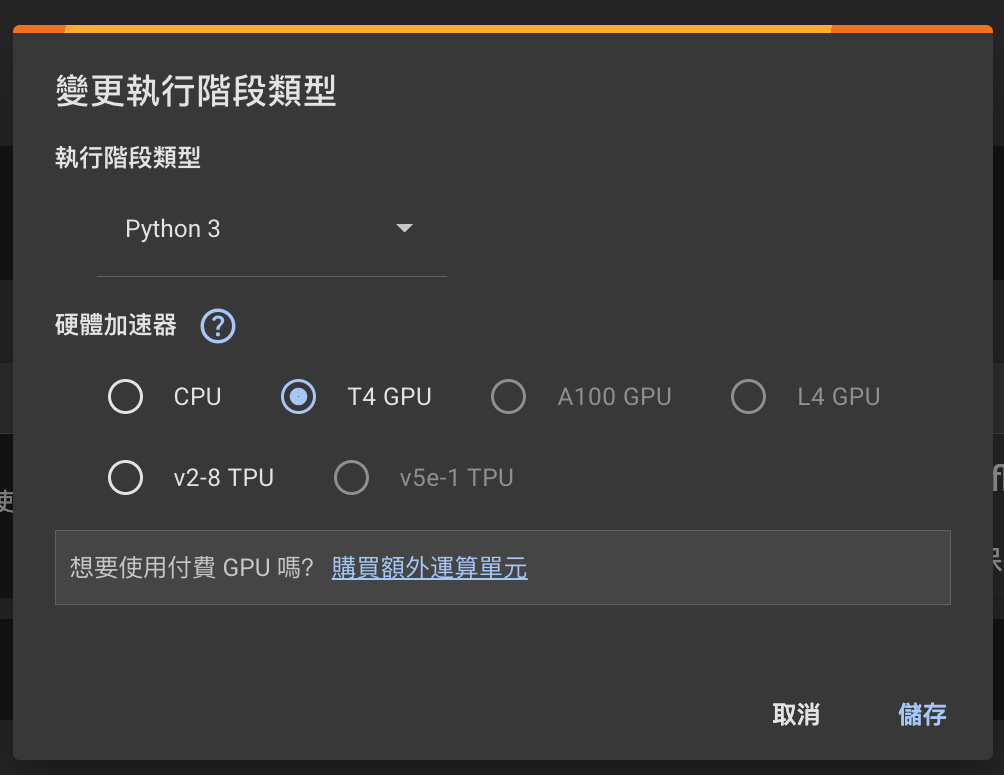

In [1]:
# running on CPU
import tensorflow as tf
tf.test.gpu_device_name()

''

In [1]:
# running on GPU
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

### 使用"!"來下終端機的指令
* 例如：`!pip install python_package`

In [2]:
!pip install opencv-python

* 例如：`!git clone github_repository_web_url`

In [3]:
!git clone https://github.com/rantsandruse/lstm_attention_tf.git

Cloning into 'lstm_attention_tf'...
remote: Enumerating objects: 50, done.
remote: Total 50 (delta 0), reused 0 (delta 0), pack-reused 50 (from 1)
Receiving objects: 100% (50/50), 68.00 KiB | 535.00 KiB/s, done.
Resolving deltas: 100% (15/15), done.


### 連接 Google Drive 和 Google Colab 並從 Google Drive 載入 Training datasets 或 Models
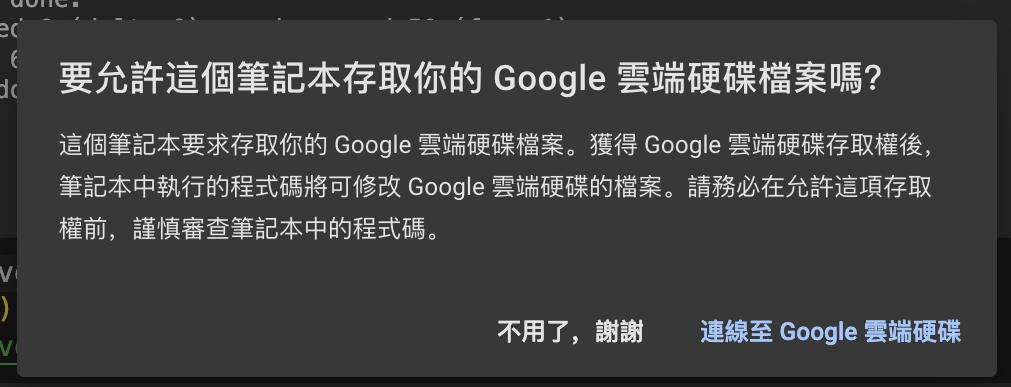
* `content/drive` 底下放著連接之 Google 帳戶的 Google Drive 內容
* 透過 `!cp "content/drive/... path_to_place` 來指定要獲取的檔案，並把該檔案放到此 Colab 的 `path_to_place` 的位置
  - 例如：假設我的硬碟(`My Drive`)底下有一個 `dataset.zip` 的壓縮檔案，然後我想要把它複製到 Colab 的當前目錄，所以執行此程式碼： `!cp "/content/drive/My Drive/dataset.zip" .`，後面的 `.` 代表要放到當前目錄。
  - 例如：跟上述例子類似，但這次變成執行此程式碼 `!cp "/content/drive/My Drive/model.h5" .` 以抓取放在同樣位置下的另一個檔案 `model.h5`。
* 註解：.h5 是 HDF5（Hierarchical Data Format version 5） 檔案格式，常用來儲存深度學習模型的權重（weights）或完整模型（結構 + 權重 + 優化器狀態）。這個格式主要被 TensorFlow/Keras 使用來儲存和載入訓練好的模型。

In [4]:
from google.colab import drive
drive.mount('/content/drive')
# !cp "/content/drive/My Drive/dataset.zip" .
# !cp "/content/drive/My Drive/model.h5" .

ValueError: mount failed

#  <span style="color: blue;">人工智慧、機器學習、深度學習簡介</span>
+ 人工智慧先驅Alan Turing，在他的這篇1950年文章，提出問題"Can machines think?"
  + 電影「模仿遊戲」裡故事男主角就是Alan Turing。<a href="https://www.youtube.com/watch?v=nuPZUUED5uk" target="_blank" title="The Imitation Game">「模仿遊戲」電影預告片 </a>
<div>
<img src="attachment:turingpaper.png" width="400"/>
</div>

Turing的論文:<a href="https://academic.oup.com/mind/article-pdf/LIX/236/433/9866119/433.pdf" target="_blank" title="Computing Machinery and Intelligence">A. M. Turing, "Computing Machinery and Intelligence," Mind 59, no. 236, 1950, pp. 433-460.</a>

+ <a href="https://zh.wikipedia.org/wiki/%E5%9B%BE%E7%81%B5%E6%B5%8B%E8%AF%95" target="_blank" title="Turing Test">圖靈測試</a>(Turing Test): 測試機器是否能表現出讓人無法區分是人或機器的實驗。

    + 當人無法區別是人或是機器在處理某件事時，是否就代表機器在處理那件事情跟人有一樣的智慧?!
       
<div>
<img src="attachment:turing_test.png" width="400"/>
</div>

---
## 人工智慧發展重要事件 (聚焦符號式人工智慧與人工類神經網路)
+ 兩千年前亞里斯多德(Aristotle)發明邏輯，為邏輯推論奠定理論基礎。
+ 19世紀，喬治·布爾（George Boole）發展邏輯代數，為數位電路設計的基礎。
+ 20世紀
  + 1950，圖靈(Turing)討論電腦是否可以有學習與創新能力，並提出圖靈測試(Turing test)。
  + 1950年代開始，除了用於計算的電腦程式外，也開始發展處理自然語言、電腦下棋的電腦程式。
  + 1956，John McCarthy將這個領域取名為人工智慧(Artificial Intelligence,AI)。
  + 1957，紐威爾(A. Newell)、恩斯特(G.W. Ernst)及西莫(H.A. Simon)提出一般性問題解決程式(the general problem solver)。
     + 提出知識表示(knowledge representation)與解答引擎(solver engine)可分別處理。
  + 1957，Frank Rosenblatt發明感知器(perceptron)。感知器是形式非常簡單的人工類神經網路，是一種二元線性分類器。
  <div>
  <img src="attachment:perceptron.png" width="400"/>
  <center>感知器</center>
  </div>
  + 1958，McCarthy發明<a href="https://en.wikipedia.org/wiki/Lisp_(programming_language)" target="_blank" title="LISP">LISP程式語言</a>。
    + 在程式語言分類上Lisp程式語言屬於函數式程式語言。
  + 1960年代，各種AI研究發展。
  + 1969，Minsky與Papert指出人工類神經網路發展的兩個問題:(1)簡單如感知器無法學習XOR-函數;(2)那時候的電腦計算能力無法處理大規模人工類神經網路。人工類神經網路研究因此就遲緩下來直到電腦計算能力足堪負荷。
  <div>
  <img  src="attachment:xor.png" width="400"/>
  </div>  
  + 1970年代，<a href="https://en.wikipedia.org/wiki/Prolog" target="_blank" title="Prolog">Prolog程式語言</a>發明。1970年代，AI的研究集中在使用演算法、試探法(heuristics)、知識庫系統(knowledge base systems)、規則為本的系統(rule-based systems)等方法，應用人類知識來解決問題。
     + 在程式語言分類上Prolog程式語言屬於邏輯式程式語言。
  + 1974，Werbos指出類似<a href="https://en.wikipedia.org/wiki/Backpropagation" target="_blank" title="Backpropagation Algorithm">反向傳播演算法</a>(Backpropagation algorithm)的概念可導入人工類神經網路。
  + 1980年代，許多公司開始採用專家系統(expert systems)技術。
    + 符號式AI(Symbolic AI)的代表。
  + 1980年代開始，人工類神經網路<a href="https://en.wikipedia.org/wiki/History_of_artificial_neural_networks" target="_blank" title="History of Artificial Neural Networks">研究復甦</a>。
    + 1980開始發展<a href="https://en.wikipedia.org/wiki/Convolutional_neural_network" target="_blank" title="Convolutional Neural Networks">卷積神經網路</a> (Convolutional Neural Networks)。
    + 1986，反向傳播演算法定名與廣泛應用於人工類神經網路。
  <div>
  <img  src="attachment:multiplayer_perceptron.png" width="400"/>
  </div>
     + <a href="https://www.youtube.com/watch?v=Ilg3gGewQ5U" target="_blank" title="Backpropagation Algorithm">反向傳播演算法解說影片</a>
    
  + <a href="http://en.wikipedia.org/wiki/Deep_Blue_(chess_computer)" target="_blank" title="IBM-Watson">IBM-Deep Blue</a>:1996年，IBM-Deep Blue西洋棋程式擊敗當時西洋棋王Garry Kasparov。
      + <a href="https://www.youtube.com/watch?v=NJarxpYyoFI" target="_blank" title="IBM-Watson">紀錄片</a>
      + <a href="https://www.pcmag.com/opinions/why-teaching-ai-to-play-games-is-important" target="_blank" title="Teaching AI to play games">Ben Dikson, "Why Teaching AI to Play Games Is Important," PC Magazine, July, 2018.</a>
  + 1997，<a href="https://zh.wikipedia.org/wiki/%E9%95%B7%E7%9F%AD%E6%9C%9F%E8%A8%98%E6%86%B6" target="_blank" title="LSTM">長短期記憶</a>(Long short-term memory，LSTM)這個重要遞迴類神經網路(RNN)發明。
   
+ 21世紀:21世紀初，演算法持續改進、大量資料累積(網際網路有很大的功勞)、硬體進展(尤其是GPU)、深度學習軟體框架。
  + 2006年，Hinton展示如何訓練深度神經網路(<a href="https://www.cs.toronto.edu/~hinton/absps/ncfast.pdf" target="_blank" title="">論文</a>)，並稱此技巧為**深度學習(Deep Learning)**。
  + 2011年2月14日至16日，一個使用自然語言來回答問題的人工智慧系統<a href="https://zh.wikipedia.org/wiki/%E6%B2%83%E6%A3%AE_(%E4%BA%BA%E5%B7%A5%E6%99%BA%E8%83%BD%E7%A8%8B%E5%BA%8F)" target="_blank" title="IBM-Watson">IBM-Watson</a>，參加益智節目「危險邊緣」。在3集節目中，IBM-Watson前兩輪中與對手打平，在最後一集裡打敗了節目史上最高獎金得主Brad Rutter和連勝紀錄保持者Ken Jennings。
    + <a href="https://www.youtube.com/watch?v=WFR3lOm_xhE" target="_blank" title="IBM-Watson">「危險邊緣」決賽片段</a>
    + <a href="https://www.youtube.com/watch?v=DywO4zksfXw" target="_blank" title="Introduction to IBM-Watson">IBM Watson技術說明影片</a>
  + 2012，深度卷積網路AlexNet，在大規模影像分類ImageNet挑戰(包含1000類別之120萬張訓練影像，5萬張驗證影像，15萬張測試影像)，其前5名準確度83.6%遠超過使用傳統電腦視覺方法的2011年冠軍的前5名準確度74.3%。    
    <div>
    <img src="attachment:alexnet.png" width="400"/>
    <center>AlexNet網路架構</center>
    </div>
    
    + AlexNet論文<a href="https://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf" target="_blank" title="AlexNet">Alex Krizhevsky, Ilya Sutskever, and, Geoffrey E Hinton, “ImageNet Classification with Deep Convolutional Neural Networks,” Advances in Neural Information Processing Systems 25, 2012, pp. 1097—1105.</a>
    + 目前深度卷積網路在ImageNet，前5名準確度已可達98%以上。<a href="https://paperswithcode.com/sota/image-classification-on-imagenet" target="_blank" title="The state-of-the-art Image Classification on ImageNet">最新現況</a>
  + <a href="https://zh.wikipedia.org/wiki/AlphaGo" target="_blank" title="AlphaGo Zero">AlphaGo:</a>於2014年開始由英國倫敦Google DeepMind所開發的人工智慧圍棋軟體，於2017年在沒有人類對手後退役。
    + <a href="https://www.alphagomovie.com/" target="_blank" title="AlphaGo">AlphaGo紀錄片</a>
    + AlphaGo論文<a href="https://www.nature.com/articles/nature16961" target="_blank" title="AlphaGo">
  David Silver et al., "Mastering the game of Go with deep neural networks and tree search," Nature 529, 2016, pp. 484-485.</a>
  + <a href="https://zh.wikipedia.org/wiki/AlphaGo#AlphaGo_Zero" target="_blank" title="AlphaGo Zero">AlphaGo Zero:</a>2017年，在沒有用到任何人類圍棋資料、人類圍棋知識，AlphaGo Zero全靠自己對奕的方式，在40天內擊敗之前的版本。<br>
    + AlphaGo Zero論文<a href="https://www.nature.com/articles/nature24270" target="_blank" title="AlphaGo Zero">David Silver et al.,"Mastering the game of Go without human knowledge," Nature 550, 2017, pp. 354–359.</a>
+ 2018年，圖靈獎(Turing Award)因對研究人工類神經網路的貢獻，頒給Geoffrey Hinton、Yann LeCun、Yoshua Bengio三人。
   + <a href="https://awards.acm.org/about/2018-turing" target="_blank">2018 Turing Award</a>
   + <a href="https://www.nytimes.com/2019/03/27/technology/turing-award-ai.html" target="_blank" title="2019, Turing Award">紐約時報相關報導</a>。
   <table>
    <tr><td colspan="3">
   <img src="https://static01.nyt.com/images/2019/03/27/business/27TURING-triptych/27TURING-triptych-articleLarge.jpg?quality=90&auto=webp" width="300">
        </td></tr>
    <tr><td style="text-align:center">Yann LeCun</td><td style="text-align:center">Geoffrey Hinton</td><td style="text-align:center">Yoshua Bengio</td></tr>
   </table>
   + 圖靈獎創立於1966年，為電腦界諾貝爾獎。
   + Geoffrey Hinton:
     + 反向傳播演算法(the backpropagation algorithm)
     + 波茲曼機(Boltzmann Machines)
     + 改進卷積類神經網路(AlexNet:ReLU+Dropout)
   + Yann LeCun:
     + 卷積類神經網路(convolutional neural networks)
     + 改善反向傳播演算法
     + 拓展類神經網路
   + Yoshua Bengio:
     + 序列概率模型（Probabilistic models of sequences）
     + 高維度詞嵌入(High-dimensional word-embeddings)和注意力模型
        + 於自然語言處理與機器翻譯。
     + Yoshua Bengio也是<a href="https://papers.nips.cc/paper/5423-generative-adversarial-nets.pdf" targer="_blank" title="GAN">生成對抗網路(Generative Adversarial Networks (GANs))</a>(用於生成幾可亂真資料的類神經網路技術)的共同作者。
    
到今日，機器學習尤其是深度學習已在許多困難的領域取得突破性進展，例如：影像分類、物件偵測、實體切割、語音辨識、數位助理、機器翻譯、廣告投放、自動駕駛、電腦下棋等。

---
## 人工智慧、機器學習、深度學習的關係

人工智慧、機器學習、深度學習三者關係如下圖。
<div>
<img src="attachment:AI-ML-DL.png" width="300"/>
</div>

+ 人工智慧:通常是指透過電腦程式來實踐一般人類的智慧工作的技術。
  + 機器學習:輸入大量訓練資料及其對應的標準答案，由電腦自行找出規則，此規則必須可以實施在不是訓練用的資料上並得到正確答案。  
  + 深度學習:機器學習的一個子領域。<font color="red">強調使用連續、多層的方式，自動得到更準確、有效的資料表示方式</font>。適合大規模資料集，對如影像辨識等感知型問題非常有效。一個深度學習模型的層數就是這個模型的深度，通常深度要超過4才會被稱為深度學習模型，不然就稱為淺層學習(shallow learning)模型。
      + <a href="https://www.youtube.com/watch?v=3JQ3hYko51Y" target="_blank" title="Neural Networks">視覺化呈現人工類神經網路</a>
  + <a href="https://en.wikipedia.org/wiki/Symbolic_artificial_intelligence" target="_blank" title="Symbolic AI">符號式AI</a>:由專家輸入足夠的知識與規則(可以視為某種程式)來完成人工智慧系統。在1950至1980年代末為AI研究的主流，並在專家系統興起時達到高峰。舉例而言，下面Prolog程式，只要描述pam、bob、tom、liz、pat、ann、jim他們的性別及雙親的關係，描述姊妹、子女關係等6個規則。接下來Prolog推理引擎就可以推論敘述
<p>?-sister(liz,bob).</p>
為真或偽。

<div>
<img src="attachment:prolog.png" width="600">
</div>

+ 符號式AI與機器學習比較
  + 符號式AI:當解決問題的規則或知識不易表達時，例如影像辨識、語音辨識、語意分析應用，符號式AI就顯得侷限。不過，符號式AI技術通常具有很好的決策解釋能力。
  + 機器學習:當訓練資料取得不易、或不足時，機器學習技術將不容易實施。目前有些機器學習技術，其決策解釋能力薄弱(成黑箱決策)，實施這類機器學習技術於緊要的應用時要十分謹慎。

## <a href="https://en.wikipedia.org/wiki/Explainable_artificial_intelligence" target="_blank" title="Explainable AI">可解釋性AI</a>
相較於黑箱決策。可解釋性AI技術強調的是人類專家可理解AI系統所給的答案的理由。
+ 延伸閱讀:https://www.ithome.com.tw/article/126283

In [ ]:
%%html
<style>
@media print {
    a[href]::after {
        content: none !important;
    }
}
</style>